In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
#t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Automatically created module for IPython interactive environment


In [2]:
y[0]

'5'

In [3]:
xx=X[1]
X.shape


(70000, 784)

In [4]:
i=int(math.sqrt(784))

In [5]:
X1 = X[0].reshape(i,i)

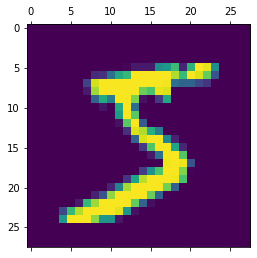

In [6]:
plt.matshow(X1)

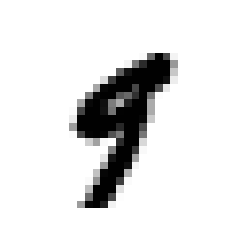

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

import sklearn
# forest_clf = RandomForestClassifier(random_state=42)
# y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
# #method="predict_proba")

In [49]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [50]:
rfc.score(X_test, y_test)
y_pred=rfc.predict(X_test)

<Figure size 864x576 with 0 Axes>

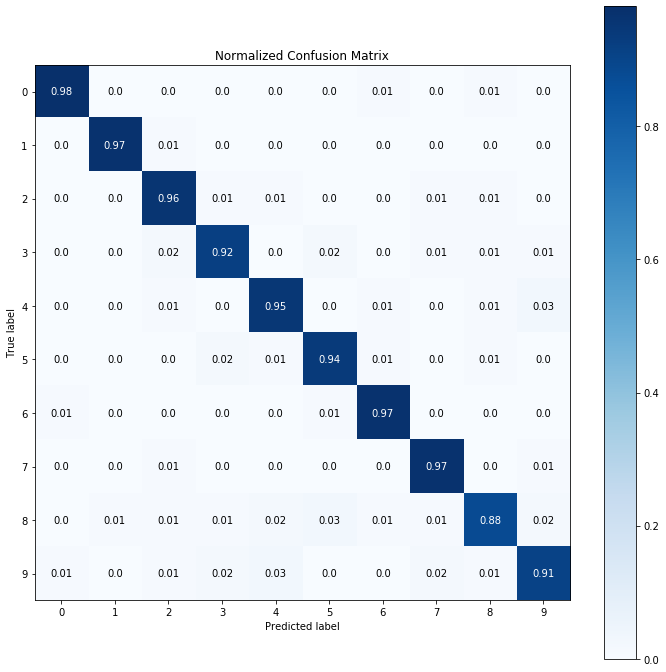

In [51]:
# EITHER RUN THIS CELL OR THE NEXT CELL DO NOT RUN BOTH

import scikitplot as skplt
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
#sklearn.metrics.plot_confusion_matrix(rfc,y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize='true',ax=ax)
plt.show()

In [4]:
# EITHER RUN THIS CELL OR THE PREVIOUS CELL DO NOT RUN BOTH


plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
print("Classification report for classifier %s:\n%s\n"
       % (rfc, metrics.classification_report(y_test, y_pred)))
#disp = metrics.plot_confusion_matrix(rfc, X_test, y_test,normalize='true',ax=ax)
# disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)

NameError: name 'rfc' is not defined

Sparsity with L1 penalty: 30.79%
Test score with L1 penalty: 0.8823


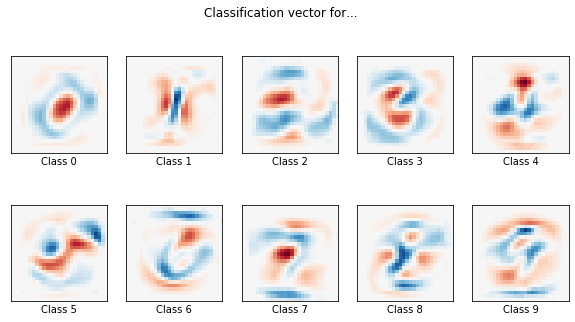

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

#run_time = time.time() - t0
#print('Example run in %.3f s' % run_time)
plt.show()